In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import math
def euclidean_distance(x1, y1, x2, y2):
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [3]:
grouped_dataframes = pd.read_pickle('grouped_dataframes.pkl')

In [4]:
names = list(grouped_dataframes.keys())
grouped_dataframes[names[5]]

,Vej-Id,Kilometer,Retning,Spor,Dato,Aarstal,Maened,Dag,Dagtype,Trafiktype,Xkoordinat,Ykoordinat,time_interval,traffic_flow,time_start
datetime,,,,,,,,,,,,,,,
1675206000,0 450-0 7/ 300 -2,7.0,-,2.0,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,552601.0,6329842.0,00:00-00:15,6.0,00:00
1675206900,0 450-0 7/ 300 -2,7.0,-,2.0,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,552601.0,6329842.0,00:15-00:30,9.0,00:15
1675207800,0 450-0 7/ 300 -2,7.0,-,2.0,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,552601.0,6329842.0,00:30-00:45,2.0,00:30
1675208700,0 450-0 7/ 300 -2,7.0,-,2.0,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,552601.0,6329842.0,00:45-01:00,0.0,00:45
1675209600,0 450-0 7/ 300 -2,7.0,-,2.0,01.02.2023,2023.0,2.0,1.0,Hverdag,BY,552601.0,6329842.0,01:00-01:15,1.0,01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704059100,0 450-0 7/ 300 -2,7.0,-,2.0,31.12.2023,2023.0,12.0,31.0,Helligdag,BY,552601.0,6329842.0,22:45-23:00,25.0,22:45
1704060000,0 450-0 7/ 300 -2,7.0,-,2.0,31.12.2023,2023.0,12.0,31.0,Helligdag,BY,552601.0,6329842.0,23:00-23:15,NaN,23:00
1704060900,0 450-0 7/ 300 -2,7.0,-,2.0,31.12.2023,2023.0,12.0,31.0,Helligdag,BY,552601.0,6329842.0,23:15-23:30,NaN,23:15


In [5]:
unique_dataframes = dict()
cords = list()
names = (grouped_dataframes.keys()) 
start_date = list()
k = 0
for name in names:
    x,y = grouped_dataframes[name]['Xkoordinat'].iloc[0], grouped_dataframes[name]['Xkoordinat'].iloc[0]
    if (x,y) not in cords:
        unique_dataframes[name] = grouped_dataframes[name]
        print("Unique Dataframes", k)
        k += 1
        cords.append((x,y))
        start_date.append((grouped_dataframes[name].index[0],grouped_dataframes[name].index[1],len(grouped_dataframes[name])))

grouped_dataframes = unique_dataframes
        

Unique Dataframes 0
Unique Dataframes 1
Unique Dataframes 2
Unique Dataframes 3
Unique Dataframes 4
Unique Dataframes 5
Unique Dataframes 6
Unique Dataframes 7
Unique Dataframes 8
Unique Dataframes 9
Unique Dataframes 10
Unique Dataframes 11
Unique Dataframes 12
Unique Dataframes 13
Unique Dataframes 14
Unique Dataframes 15
Unique Dataframes 16
Unique Dataframes 17
Unique Dataframes 18
Unique Dataframes 19
Unique Dataframes 20
Unique Dataframes 21
Unique Dataframes 22
Unique Dataframes 23
Unique Dataframes 24
Unique Dataframes 25
Unique Dataframes 26
Unique Dataframes 27
Unique Dataframes 28
Unique Dataframes 29
Unique Dataframes 30
Unique Dataframes 31
Unique Dataframes 32
Unique Dataframes 33
Unique Dataframes 34
Unique Dataframes 35
Unique Dataframes 36
Unique Dataframes 37
Unique Dataframes 38
Unique Dataframes 39
Unique Dataframes 40
Unique Dataframes 41
Unique Dataframes 42
Unique Dataframes 43
Unique Dataframes 44
Unique Dataframes 45
Unique Dataframes 46
Unique Dataframes 47
Un

In [6]:
# from datetime import datetime
# import time
# def find_longest_common_period(dataframes_dict):
#     """
#     This function finds the longest common date range across a dictionary of dataframes, 
#     where each dataframe's index is a datetime object representing the time series.
    
#     Parameters:
#     dataframes_dict (dict): A dictionary of DataFrames where each DataFrame has a datetime index.

#     Returns:
#     tuple: Start and end date of the longest common period.
#     """
#     # Initialize the start and end dates to the extreme opposites
#     max_start_date = timestamp = time.mktime(time.strptime('1970-10-20 22:24:46', '%Y-%m-%d %H:%M:%S'))
#     min_end_date = timestamp = time.mktime(time.strptime('2025-10-20 22:24:46', '%Y-%m-%d %H:%M:%S'))

#     # Loop through each DataFrame to find the latest start date and earliest end date
#     for df in dataframes_dict.values():
#         # Get the start and end dates of each DataFrame
#         df_start_date = df.index.min()
#         df_end_date = df.index.max()

#         # Update the max of start dates and min of end dates
#         max_start_date = max(max_start_date, df_start_date)
#         min_end_date = min(min_end_date, df_end_date)
#         print(max_start_date, min_end_date)
#     # Check if there's a valid common period
#     if max_start_date <= min_end_date:
#         return max_start_date, min_end_date
#     else:
#         return None  # No overlapping period found

# find_longest_common_period(cleaned_dataframes)

In [7]:
start_time = '2022-01-01'
end_time = '2024-01-01'

In [8]:
def create_15min_interval_index(start_date, end_date):
    # Convert start_date and end_date to milliseconds
    current_time = int(start_date.timestamp())
    end_time = int(end_date.timestamp())
    
    # Interval in milliseconds (15 minutes = 900000 ms)
    interval = 900

    # List to hold each timestamp in milliseconds
    time_index_ms = []

    # Loop to generate timestamps at 15-minute intervals
    while current_time <= end_time:
        time_index_ms.append(current_time)
        current_time += interval

    return pd.Index(time_index_ms)


In [57]:
# Determine the earliest start date and latest end date across all DataFrames
start_date = min(df.index.min() for df in grouped_dataframes.values() if df.index.notna().all())
end_date = max(df.index.max() for df in grouped_dataframes.values() if df.index.notna().all())

start_date = pd.Timestamp("2022-01-01 00:00:00")
end_date = pd.Timestamp("2024-01-01 00:00:00")

time_index_ms = create_15min_interval_index(start_date, end_date)
print(time_index_ms)

everything_df = pd.DataFrame(index=time_index_ms, columns=range(0,179,1))


Index([1640995200, 1640996100, 1640997000, 1640997900, 1640998800, 1640999700,
       1641000600, 1641001500, 1641002400, 1641003300,
       ...
       1704059100, 1704060000, 1704060900, 1704061800, 1704062700, 1704063600,
       1704064500, 1704065400, 1704066300, 1704067200],
      dtype='int64', length=70081)


In [43]:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [62]:
# Collect data without inserting directly into everything_df
for i, name in enumerate(cleaned_dataframes):
    print(i, len(cleaned_dataframes))
    df = cleaned_dataframes[name]['traffic_flow'][0:200]

    for j, traffic_flow in enumerate(df):
        idx = df.index[j]
        #print("DF: ",name,idx)
        everything_df.loc[idx, name] = traffic_flow

        if j%100==0:
            print(j, len(df))

    break



0 180
0 200
100 200


In [65]:
everything_df.isna().sum()

0      69887
1      70081
2      70081
3      70081
4      70081
       ...  
174    70081
175    70081
176    70081
177    70081
178    70081
Length: 179, dtype: int64

In [ ]:
print(time_index_ms[0])
print(1672527600)

1640995200
1672527600


In [ ]:
# set max rows print option
pd.set_option('display.max_rows', 100)

start_date = pd.Series(start_date)
print(start_date.value_counts())

(1672527600, 1672528500, 61344)    24
(1672527600, 1672528500, 61056)    12
(1672527600, 1672528500, 60960)     9
(1672527600, 1672528500, 61248)     8
(1704063600, 1704064500, 26304)     8
(1672527600, 1672528500, 61152)     6
(1672527600, 1672528500, 60096)     5
(1672527600, 1672528500, 35040)     5
(1672527600, 1672528500, 56544)     4
(1672527600, 1672528500, 60192)     4
(1672527600, 1672528500, 59040)     4
(1672527600, 1672528500, 60672)     4
(1672527600, 1672528500, 59904)     4
(1672527600, 1672528500, 34560)     4
(1672527600, 1672528500, 55296)     4
(1672527600, 1672528500, 52608)     3
(1672527600, 1672528500, 33696)     3
(1672527600, 1672528500, 59616)     3
(1672527600, 1672528500, 59424)     3
(1672527600, 1672528500, 60000)     3
(1672527600, 1672528500, 34848)     3
(1672527600, 1672528500, 34752)     3
(1672527600, 1672528500, 50592)     2
(1672527600, 1672528500, 52896)     2
(1704063600, 1704064500, 50976)     2
(1672527600, 1672528500, 58560)     2
(1672527600,

In [22]:
import math

def find_closest_unconnected_nodes(grouped_dataframes):
    closest = dict()
    cleaned_dataframes = {}
    names = list(grouped_dataframes.keys())
    for i, name in enumerate(names):
        print(f"{i}/{len(names)}")
        df = grouped_dataframes[name]
        cleaned_dataframes[i] = df[['traffic_flow', 'Xkoordinat', 'Ykoordinat']].copy()
        x1, y1 = df['Xkoordinat'].iloc[0], df['Ykoordinat'].iloc[0]
        
        for j, other_name in enumerate(names):
            if j != i:
                df2 = grouped_dataframes[other_name]
                x2, y2 = df2['Xkoordinat'].iloc[0], df2['Ykoordinat'].iloc[0]
                closest[j] = euclidean_distance(x1, y1, x2, y2)
        
        for k in range(0,10,1):
            cleaned_dataframes[i][f'closest_edge_{k}'] = None
            smallest_edge = min(closest, key=closest.get)
            cleaned_dataframes[i][f'closest_edge_{k}'] = smallest_edge
            closest.pop(smallest_edge)

    
    return cleaned_dataframes

cleaned_dataframes = find_closest_unconnected_nodes(grouped_dataframes)

0/180
1/180
2/180
3/180
4/180
5/180
6/180
7/180
8/180
9/180
10/180
11/180
12/180
13/180
14/180
15/180
16/180
17/180
18/180
19/180
20/180
21/180
22/180
23/180
24/180
25/180
26/180
27/180
28/180
29/180
30/180
31/180
32/180
33/180
34/180
35/180
36/180
37/180
38/180
39/180
40/180
41/180
42/180
43/180
44/180
45/180
46/180
47/180
48/180
49/180
50/180
51/180
52/180
53/180
54/180
55/180
56/180
57/180
58/180
59/180
60/180
61/180
62/180
63/180
64/180
65/180
66/180
67/180
68/180
69/180
70/180
71/180
72/180
73/180
74/180
75/180
76/180
77/180
78/180
79/180
80/180
81/180
82/180
83/180
84/180
85/180
86/180
87/180
88/180
89/180
90/180
91/180
92/180
93/180
94/180
95/180
96/180
97/180
98/180
99/180
100/180
101/180
102/180
103/180
104/180
105/180
106/180
107/180
108/180
109/180
110/180
111/180
112/180
113/180
114/180
115/180
116/180
117/180
118/180
119/180
120/180
121/180
122/180
123/180
124/180
125/180
126/180
127/180
128/180
129/180
130/180
131/180
132/180
133/180
134/180
135/180
136/180
137/180
138/18

In [23]:
# Initialize the graph
graph = nx.Graph()

names = list(cleaned_dataframes.keys())

# Add nodes and edges to the graph
for i in range(len(names)):
    idx = cleaned_dataframes[names[i]].first_valid_index()
    
    # Add node with attributes
    graph.add_node(
        i,
        x=cleaned_dataframes[names[i]]['Xkoordinat'][idx],
        y=cleaned_dataframes[names[i]]['Ykoordinat'][idx],
        traffic=cleaned_dataframes[names[i]]['traffic_flow'].values
    )
    k = 0
    for j in range(0,10,1):
        # Get the ID of the closest edge and add an edge between nodes
        closest_node = cleaned_dataframes[names[i]][f'closest_edge_{j}'].iloc[0]
        print(i,closest_node)
        graph.add_edge(i, closest_node)  # Add edge by node indices (i, closest_node)
        #graph.add_edge(i, np.random.randint(484))  # Add edge by node indices (i, closest_node)


0 1
0 144
0 159
0 151
0 145
0 154
0 157
0 143
0 152
0 139
1 0
1 144
1 159
1 151
1 145
1 154
1 157
1 146
1 179
1 143
2 70
2 50
2 3
2 59
2 65
2 4
2 46
2 47
2 176
2 5
3 59
3 65
3 70
3 50
3 4
3 2
3 46
3 47
3 176
3 5
4 65
4 59
4 3
4 70
4 50
4 2
4 46
4 47
4 176
4 5
5 51
5 6
5 66
5 7
5 71
5 60
5 47
5 46
5 8
5 52
6 66
6 7
6 71
6 51
6 60
6 5
6 8
6 52
6 9
6 72
7 71
7 66
7 6
7 51
7 60
7 8
7 5
7 52
7 9
7 72
8 52
8 9
8 72
8 60
8 10
8 169
8 7
8 71
8 66
8 6
9 72
9 52
9 8
9 10
9 169
9 60
9 7
9 71
9 66
9 6
10 9
10 72
10 52
10 169
10 8
10 60
10 175
10 11
10 7
10 71
11 12
11 10
11 169
11 175
11 9
11 72
11 52
11 8
11 13
11 53
12 11
12 13
12 53
12 54
12 58
12 73
12 61
12 14
12 175
12 10
13 53
13 54
13 58
13 73
13 61
13 14
13 12
13 15
13 16
13 17
14 61
14 73
14 58
14 54
14 53
14 13
14 15
14 16
14 17
14 12
15 16
15 17
15 14
15 61
15 18
15 73
15 19
15 67
15 62
15 58
16 15
16 17
16 18
16 14
16 61
16 19
16 67
16 62
16 73
16 58
17 16
17 15
17 18
17 19
17 67
17 62
17 14
17 61
17 73
17 58
18 19
18 67
18 62
18 17
1

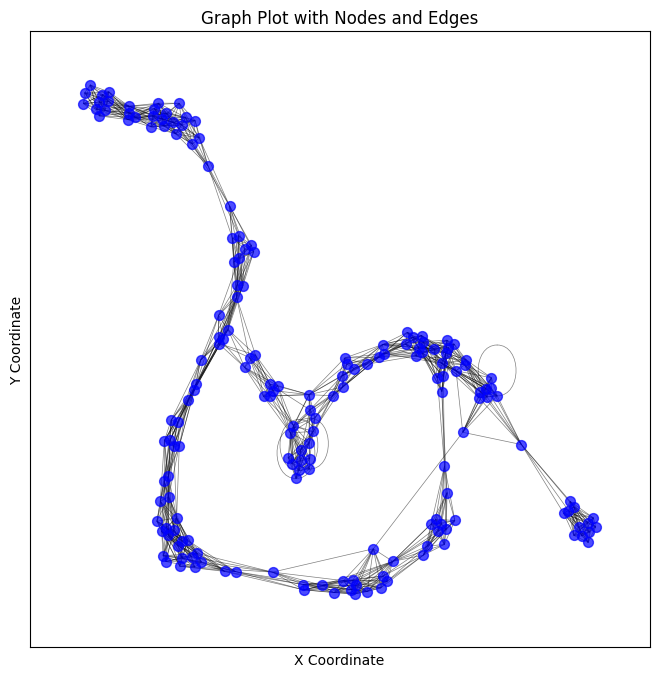

In [24]:

# Define the positions of the nodes using their 'x' and 'y' attributes
pos = nx.spring_layout(graph, seed=1337)  # Use a fixed seed for reproducibility


# Plot the graph
plt.figure(figsize=(8, 8))

# Draw nodes with custom size
nx.draw_networkx_nodes(graph, pos, node_size=50, node_color="blue", alpha=0.7)

# Draw edges with custom width
nx.draw_networkx_edges(graph, pos, width=0.5, edge_color="black", alpha=0.5)

# Optionally, draw labels for each node if you want to see the node IDs or specific data
# Uncomment the following line if you'd like to see labels (e.g., traffic values or node IDs)
# nx.draw_networkx_labels(graph, pos, labels={node: node for node in graph.nodes()}, font_size=8)

# Set plot labels and title
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Graph Plot with Nodes and Edges")

# Show the plot
plt.show()

In [25]:
nx.write_graphml(graph, "graph.graphml")

NetworkXError: GraphML writer does not support <class 'numpy.ndarray'> as data values.

In [ ]:

def clean_graph(graph):
    # Remove self-loops
    self_loops = list(nx.selfloop_edges(graph))
    graph.remove_edges_from(self_loops)
    
    # Remove duplicate edges (not necessary for undirected graphs in NetworkX)
    # Here just in case your graph is directed or you need further verification
    edges_to_remove = []
    for u, v, data in graph.edges(data=True):
        if graph.number_of_edges(u, v) > 1:  # More than one edge exists
            edges_to_remove.append((u, v))
    
    graph.remove_edges_from(edges_to_remove)
    
    print(f"Removed {len(self_loops)} self-loops and {len(edges_to_remove)} duplicate edges.")
    return graph

graph = clean_graph(graph)

Removed 0 self-loops and 0 duplicate edges.


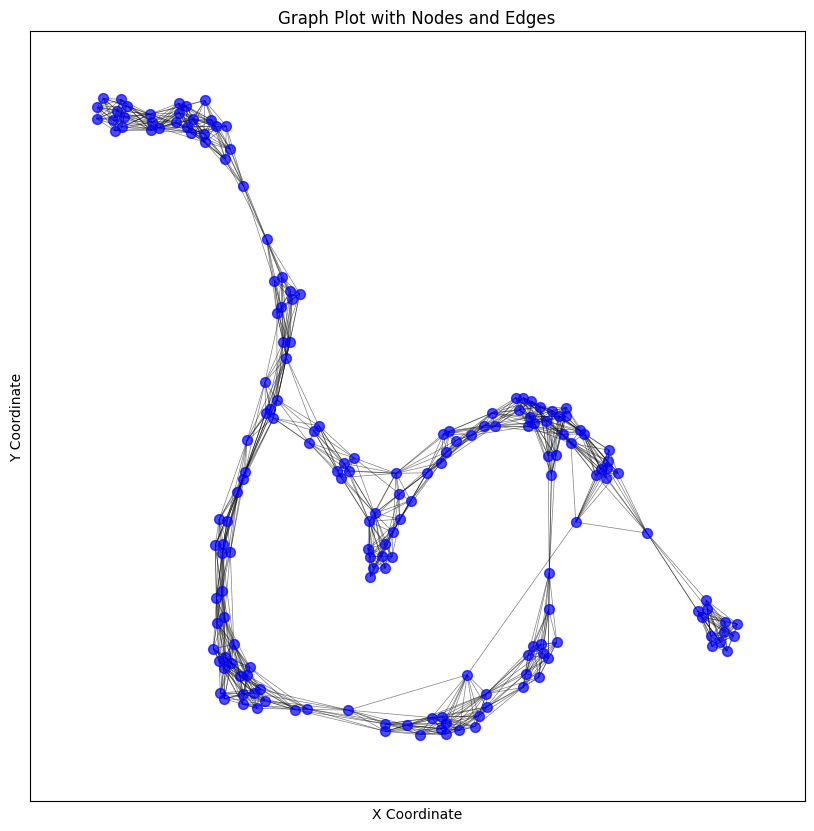

In [ ]:
# extract largest component
largest_component = max(nx.connected_components(graph), key=len)
subgraph = graph.subgraph(largest_component)
# Plot the graph
plt.figure(figsize=(10, 10))

# Draw nodes with custom size
nx.draw_networkx_nodes(subgraph, pos, node_size=50, node_color="blue", alpha=0.7)

# Draw edges with custom width
nx.draw_networkx_edges(subgraph, pos, width=0.5, edge_color="black", alpha=0.5)

# Optionally, draw labels for each node if you want to see the node IDs or specific data
# Uncomment the following line if you'd like to see labels (e.g., traffic values or node IDs)
# nx.draw_networkx_labels(graph, pos, labels={node: node for node in graph.nodes()}, font_size=8)

# Set plot labels and title
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Graph Plot with Nodes and Edges")

# Show the plot
plt.show()

180

NetworkXError: GraphML writer does not support <class 'dict'> as data values.